In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns

In [2]:
dat = datasets.load_diabetes()

In [3]:
X = dat['data']
y = dat['target']

In [4]:
df = pd.DataFrame(X, columns=["age","sex","bmi","bp","tc","ldl","hdl","tch","ltg","glu"])

In [5]:
df["progression"] = y

In [6]:
print(dat['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<AxesSubplot: >

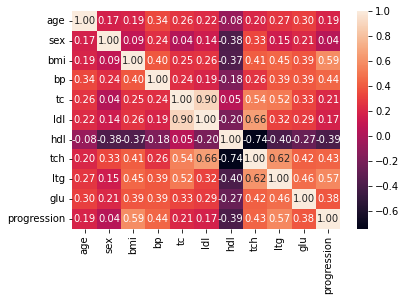

In [7]:
sns.heatmap(df.corr(),annot=True, fmt='0.2f')

In [8]:
print("The X values are")
print(X)

The X values are
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [9]:
#defining label
y = df['progression']

In [10]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state=1)

In [11]:
# print some information about the training and test datasets
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (221, 10)
y_train:  (221,)
X_test:  (221, 10)
y_test:  (221,)


In [12]:
#fitting the model
reg = linear_model.LinearRegression().fit(X_train,y_train)

In [13]:
#predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [14]:
#showing the outputs
#intercept
print(f'the intercept is:{reg.intercept_: .2f}')
#slope
print(f'the slope is:{reg.coef_}')
#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train,y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test,y_test): .2f}') #test set

the intercept is: 155.09
the slope is:[  -87.13467085  -166.70511135   578.92317734   274.49466324
 -1109.7150304    773.09098659   340.90264587   271.16160354
   872.95256215   120.96791158]
Coeff. of determination on train set: 0.57
Coeff. of determination on test set: 0.43


Text(0, 0.5, 'PREDICTED VALUES')

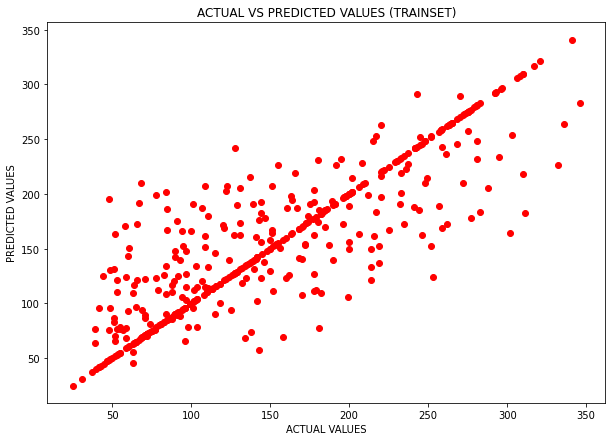

In [15]:
#image dimensions
plt.figure(figsize=(10,7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred,c ='red')
plt.scatter(y_train,y_train,color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TRAINSET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')